Grading: 

* Read the description of the problem and identify your input and output variables. Load the data using pandas and split the data frame into X (inputs) and y (outputs). 2 points.

* Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. 7 points.

* Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options of target variables, you can select some of them after this step with a couple of sentences explaining your choice. 7 points.


* Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction. 9 points.

* Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion. 5 points.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

# Loading data

In [2]:
df = pd.read_csv('risk_factor_cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df.shape

(858, 36)

# Missing data handling

The main point of first view is that missing data represented by '?'. First of all, we should replace it with NaN values to handle missing data.

In [4]:
df = df.replace('?', np.nan)
df = df.convert_objects(convert_numeric=True)
df.head()

/Users/dzisandy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Let's count amount of NaN's to handle it in a proper way. 

In [5]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

From represented data we can see two types of data with NaN: one has small amount of NaN's (Number of sexual partners, First sexual intercourse, Num of pregnancies etc.), second one is more than 10% of data filled with NaN's. First type we can inplace with median value of a columnm if it's not binary (ifd it's small enough we can drop data, but i don't want to drop). 

In [6]:
df['First sexual intercourse'].fillna(df['First sexual intercourse'].median(), inplace = True)
df['Num of pregnancies'].fillna(df['Num of pregnancies'].median(), inplace = True)
df['First sexual intercourse'].fillna(df['First sexual intercourse'].median(), inplace = True)
df['Number of sexual partners'].fillna(df['Number of sexual partners'].median(), inplace = True)
df['Smokes'].fillna(0, inplace = True)

#inplacing smokes (years), (packs/year) 0 if smokes == 0, else median
df.loc[df['Smokes'] == 0,'Smokes (years)'].fillna(0, inplace = True)
df.loc[df['Smokes'] == 1,'Smokes (years)'].fillna(df.loc[df['Smokes'] == 1,'Smokes (years)'].median(), inplace = True)
df.loc[df['Smokes'] == 0,'Smokes (packs/year)'].fillna(0, inplace = True)
df.loc[df['Smokes'] == 1,'Smokes (packs/year)'].fillna(df.loc[df['Smokes'] == 1,'Smokes (packs/year)'].median(), inplace = True)

In [7]:
#df.isnull().sum()

STDs: Time since first diagnosis, STDs: Time since last diagnosis  to many empty data, will drop it

In [8]:
df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],1)

## Data splitting  in input (X) & output (Y)

A biopsy is a medical test commonly performed by a surgeon, interventional radiologist, or an interventional cardiologist involving extraction of sample cells or tissues for examination to determine the presence or extent of a disease. That's why I use this data as a target one, because it states cancer disease with the biggest probability. Dropping STDs:cervical condylomatosis, STDs:AIDS features is caused by the corr picture case: they give Nan values for correlation, that's why we can't find relations between this features and another part of dataset.

In [9]:
Y = df['Biopsy']
X = df.drop(['Biopsy','STDs:cervical condylomatosis','STDs:AIDS'], 1)

In [10]:
corr = X.corr()
#corr

To fulfill another features (that have more than 100 NaN's) we need to find correlated features and make "simple predictions", to help us heatmap is suitable.

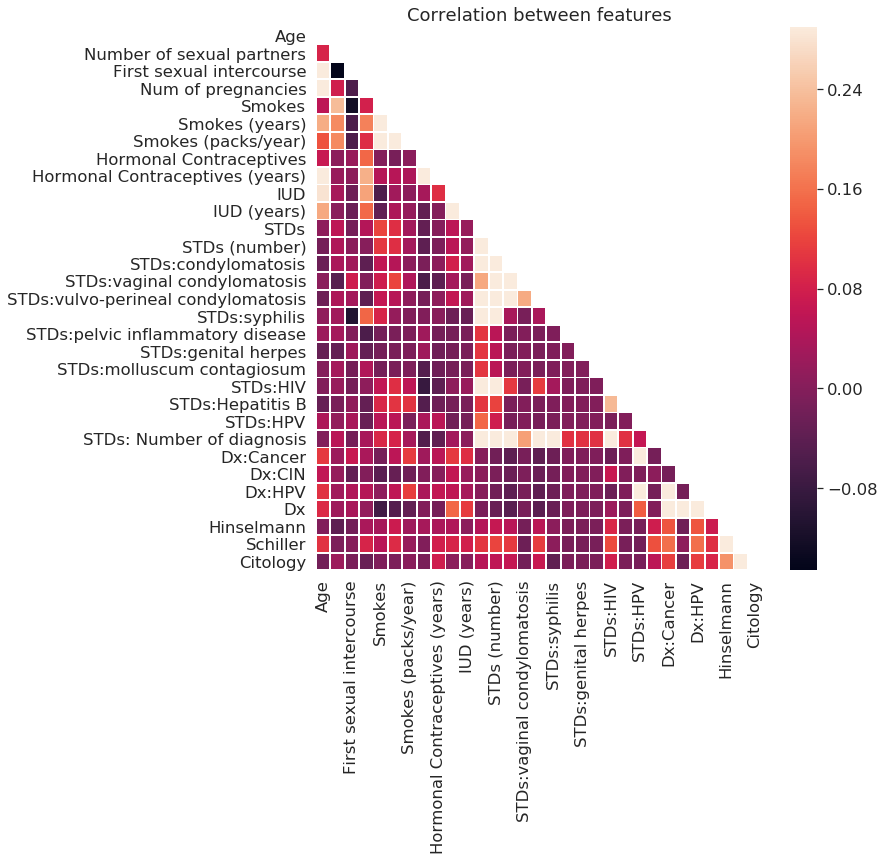

In [11]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.5)
with sns.axes_style("white"):
    ax = sns.heatmap(corr,mask=mask, vmax=0.29, linewidths=.8)
plt.title('Correlation between features')
plt.show()

Most correlated features for Hormonal Contraceptives are Age and Num of pregnancies. Let's suppose, that if person's is older, than average value of Age or have pregnancies less than average amount of pregnancies, Hormonal Contraceptives are being used. 

In [12]:
X.loc[df['Age'] > X['Age'].mean(),'Hormonal Contraceptives'] = X.loc[df['Age'] > X['Age'].mean(),'Hormonal Contraceptives'].fillna(1)
X.loc[df['Num of pregnancies']<X['Num of pregnancies'].mean(),'Hormonal Contraceptives'] = X.loc[df['Num of pregnancies']<df['Num of pregnancies'].mean(),'Hormonal Contraceptives'].fillna(1)
X['Hormonal Contraceptives'].fillna(0,inplace = True)

Check if all data is fulfilled

In [13]:
X['Hormonal Contraceptives'].isnull().sum()

0

To fulfill Hormonal Contraceptives (years) i'll use simple rule: if Hormonal Contraceptives == 1: median value, else 0.

In [14]:
X.loc[X['Hormonal Contraceptives'] == 1,'Hormonal Contraceptives (years)'].fillna(X['Hormonal Contraceptives (years)'].median(), inplace = True)
X.loc[X['Hormonal Contraceptives'] == 0,'Hormonal Contraceptives (years)'].fillna(0, inplace = True)


Let's do same procedure for IUD. It's not clear for me from heatmap what features are correlated with IUD, we should have corrwidth info. I suppose, that this feature is also correlated with Age and Number of pregnancies

In [15]:
X.corrwith(df['IUD'])

Age                                   0.280942
Number of sexual partners             0.033719
First sexual intercourse             -0.022355
Num of pregnancies                    0.209754
Smokes                               -0.057273
Smokes (years)                        0.029413
Smokes (packs/year)                   0.008277
Hormonal Contraceptives               0.032879
Hormonal Contraceptives (years)       0.099001
IUD                                   1.000000
IUD (years)                           0.746478
STDs                                  0.056257
STDs (number)                         0.054393
STDs:condylomatosis                   0.079059
STDs:vaginal condylomatosis           0.032103
STDs:vulvo-perineal condylomatosis    0.063343
STDs:syphilis                        -0.023617
STDs:pelvic inflammatory disease     -0.013131
STDs:genital herpes                  -0.013131
STDs:molluscum contagiosum           -0.013131
STDs:HIV                              0.009445
STDs:Hepatiti

As I expected, feature correlated with Age and Number of sexual partners. Because IUD is a unknown contraceptive for me, I can't provide any adequate idea of fulfilling, such as I provided in case of Hormonal Contraceptives. Let's watch the same idea like Hormonal Contraceptives determination.

In [16]:
len(X[(X['Age']>X['Age'].mean())&(X['IUD']==1)])/ len(X[X['IUD']==1])

0.7951807228915663

As represented above, above 79% of people, older than mean value of age use this type of Contraceptives. I think, that amount of pregnancies for that type will be lower than average value for pregnancies, let's check it and fulfill remaining data according to this research.

In [17]:
X.loc[X['Age']>X['Age'].mean(),'IUD'].fillna(1, inplace = True)

In [18]:
len(X[(X['Num of pregnancies']<X['Num of pregnancies'].mean())&(X['IUD']==0)])/ len(X[X['IUD'] ==0])

0.6960486322188449

I'm totally mistaken 69% of people lower pregnancy rate without IUD using. So I will fulfill remaining with zeros.

In [19]:
X['IUD'].fillna(0, inplace = True)

In [20]:
X['IUD'].isnull().sum()

0

For years we will do same procedure as for feature Hormonal Contraceptives (years).

In [21]:
X.loc[X['IUD'] == 1,'IUD (years)'].fillna(X['IUD (years)'].median(), inplace = True)
X.loc[X['IUD'] == 0,'IUD (years)'].fillna(0, inplace = True)

One more time NaN amount check

In [22]:
X.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       108
IUD                                     0
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

To continue fulfilling, we should check the correlation between STD features, maybe It will save time of our research. If there will be no real correlation between them, it's easier for us to drop this data.

In [23]:
STD = X[['STDs','STDs (number)','STDs:condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis']]

In [24]:
STD.corr()

,STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis
STDs,1.000000,0.918609,0.727645,0.213455,0.718822,0.457098,0.106514,0.106514,0.106514,0.457098,0.106514,0.150734,0.906662
STDs (number),0.918609,1.000000,0.899521,0.334849,0.890699,0.306830,0.053462,0.053462,0.053462,0.384231,0.118393,0.075657,0.897233
STDs:condylomatosis,0.727645,0.899521,1.000000,0.293350,0.987875,0.035145,-0.009084,-0.009084,-0.009084,0.109276,-0.009084,-0.012856,0.699038
STDs:vaginal condylomatosis,0.213455,0.334849,0.293350,1.000000,0.218217,-0.011436,-0.002665,-0.002665,-0.002665,-0.011436,-0.002665,-0.003771,0.205063
STDs:vulvo-perineal condylomatosis,0.718822,0.890699,0.987875,0.218217,1.000000,0.036422,-0.008974,-0.008974,-0.008974,0.111357,-0.008974,-0.012700,0.690562
STDs:syphilis,0.457098,0.306830,0.035145,-0.011436,0.036422,1.000000,-0.005707,-0.005707,-0.005707,0.032426,-0.005707,-0.008076,0.412032
STDs:pelvic inflammatory disease,0.106514,0.053462,-0.009084,-0.002665,-0.008974,-0.005707,1.000000,-0.001330,-0.001330,-0.005707,-0.001330,-0.001882,0.102327
STDs:genital herpes,0.106514,0.053462,-0.009084,-0.002665,-0.008974,-0.005707,-0.001330,1.000000,-0.001330,-0.005707,-0.001330,-0.001882,0.102327
STDs:molluscum contagiosum,0.106514,0.053462,-0.009084,-0.002665,-0.008974,-0.005707,-0.001330,-0.001330,1.000000,-0.005707,-0.001330,-0.001882,0.102327
STDs:HIV,0.457098,0.384231,0.109276,-0.011436,0.111357,0.032426,-0.005707,-0.005707,-0.005707,1.000000,0.233023,-0.008076,0.547506


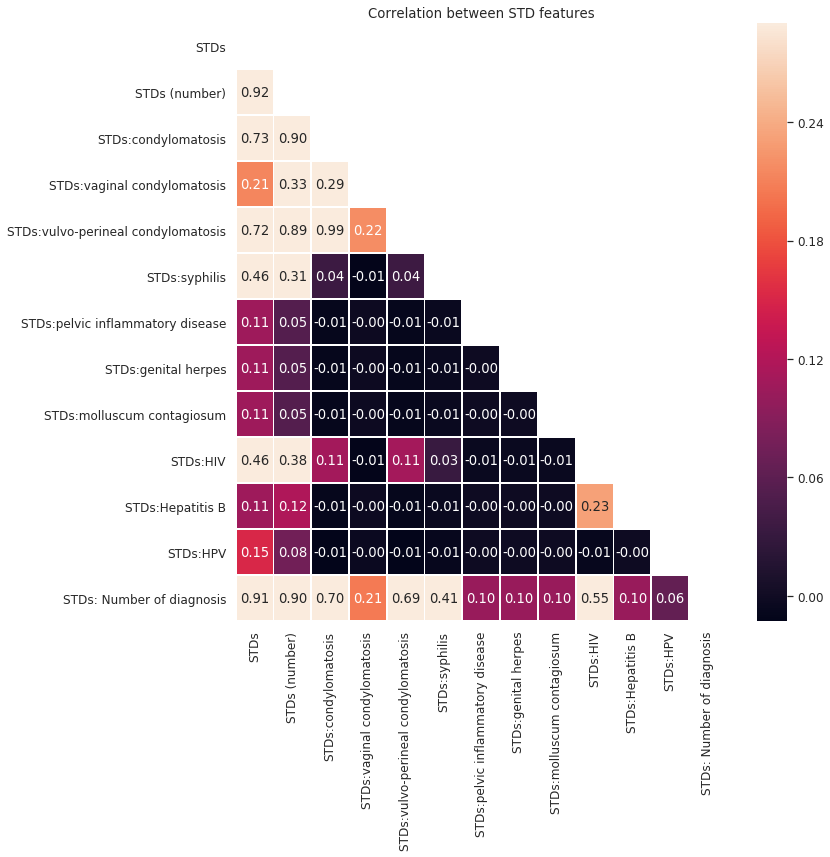

In [25]:
plt.figure(figsize=(11,11))
mask = np.zeros_like(STD.corr())
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 1.1)
with sns.axes_style("white"):
    ax = sns.heatmap(STD.corr(),mask=mask, vmax=0.29, linewidths=.8,  annot=True, fmt=".2f")
plt.title('Correlation between STD features')
plt.show()

Looking on this and previous heatmap, It's more easier to drop data with NAN values in STD features, rather than find hard dependencies, trying to fulfill them. We will watch whether its suitable or we should try to fulfill STD data.

In [26]:
X.shape

(858, 31)

In [27]:
X1 = pd.concat([X, Y], axis=1)
X1 = X1.dropna()
Y2 = X1['Biopsy']
X2 = X1.drop(['Biopsy'] , 1)

In [28]:
X2.shape

(726, 31)

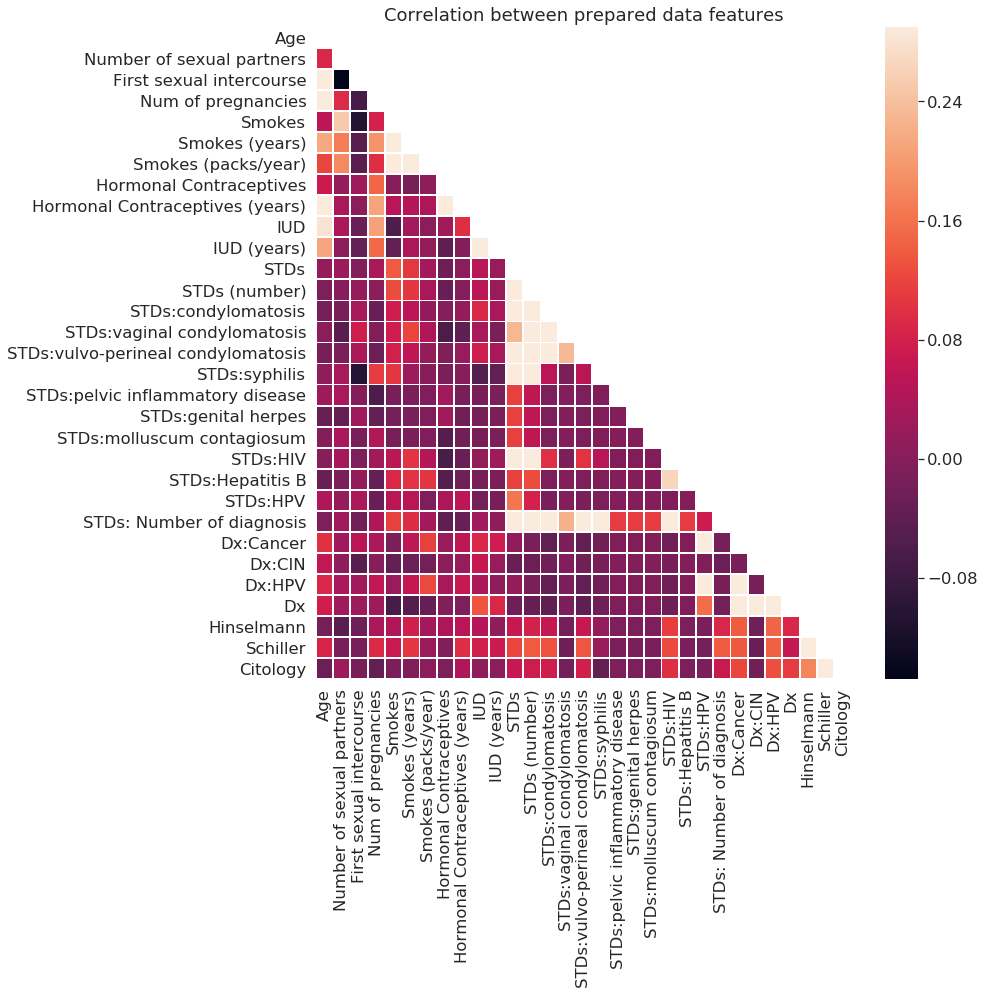

In [29]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(X2.corr())
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 1.5)
with sns.axes_style("white"):
    ax = sns.heatmap(X2.corr(),mask=mask, vmax=0.29, linewidths=.8)
plt.title('Correlation between prepared data features')
plt.show()

As we can see on corr matrix there are no simple depencencies, exept Age and First sexual intercourse and Number of pregnancies, Hormonal contraceptives (years) and Age. Maybe we can generate new features out of them, let's try doing it.

In [30]:
X2['Years since first time'] = X2['Age'] - X2['First sexual intercourse']
X2['HC/Age'] = X2['Hormonal Contraceptives (years)'] / X2['Age']
X2['Numpreg/Age'] = X2['Num of pregnancies'] / X2['Age']
X2['Numpart/Age'] = X2['Number of sexual partners'] / X2['Age']

# Let's look on corr with labels, maybe we have to pay more attention on some features and pay more attention on some algorithms.

In [31]:
X2.corrwith(Y)

Age                                   0.048656
Number of sexual partners            -0.000693
First sexual intercourse              0.010223
Num of pregnancies                    0.045685
Smokes                                0.044055
Smokes (years)                        0.073018
Smokes (packs/year)                   0.029851
Hormonal Contraceptives               0.010282
Hormonal Contraceptives (years)       0.103366
IUD                                   0.059111
IUD (years)                           0.037056
STDs                                  0.117926
STDs (number)                         0.110973
STDs:condylomatosis                   0.104077
STDs:vaginal condylomatosis          -0.020243
STDs:vulvo-perineal condylomatosis    0.107042
STDs:syphilis                        -0.039502
STDs:pelvic inflammatory disease     -0.010100
STDs:genital herpes                   0.136559
STDs:molluscum contagiosum           -0.010100
STDs:HIV                              0.120074
STDs:Hepatiti

From corrwidth we can see, that no features are correlated enough with output labels to provide simple desicion from one or linear dependency of features. So we should pay attention to dependencies in case of classification problem.

Let's check features whether they are informative or not, let's watch their value counts.

In [32]:
for item in X2.columns:
    print(item)
    print(X2[item].value_counts())
    print('____________________')

Age
23    43
18    43
21    41
20    39
24    33
28    33
19    32
25    31
26    30
27    30
29    30
30    30
17    29
35    28
33    26
36    21
34    21
22    20
31    19
16    18
37    16
15    16
32    16
40    12
41    12
39     9
38     6
45     6
42     6
43     5
44     4
14     3
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
Name: Age, dtype: int64
____________________
Number of sexual partners
2.0     243
3.0     181
1.0     178
4.0      65
5.0      41
6.0       7
7.0       5
8.0       4
9.0       1
28.0      1
Name: Number of sexual partners, dtype: int64
____________________
First sexual intercourse
15.0    142
17.0    136
18.0    118
16.0     96
14.0     63
19.0     48
20.0     35
21.0     20
13.0     19
23.0      8
22.0      7
26.0      7
24.0      6
27.0      5
29.0      4
28.0      3
25.0      2
10.0      2
11.0      2
12.0      2
32.0      1
Name: First sexual intercourse, dtype: int64
____________________

From this analisys, we can see, that some features are non informative (for example values: {1}:1, {0}:725). We can drop this columns.

In [33]:
X2 = X2.drop(['STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:Hepatitis B'],1)

In [34]:
Y2.shape

(726,)

In [35]:
Y2.sum()

50

So as we can see, classes are unbalances, because len(class{1}) << len(class{0}). We should take care of it, why processing the classification.

# Classification

Now the goal is to find algorithm and provide cross validation. As metrics for algo we will use recall metrics. The main point of using recall is the statement of problem: we should find cancer if it's real case and penalty algorithm for not predicting it. So in case of metrics cancer labels are defined by {1} label, so we should make our best fo make our algorithm work like that:max amount of algorithm(X in {1}) = 1 and minimize amount of algorithm(X in {1}) = 0. Briefly speaking, we should increase True Positive and Decrease False Negative. According to definition of recall metrics, we should maximize it in our case. Because of unbalanced classes (many '0') we will provide stratified K-Fold cross validation. Data will be splitted in 70% train set & 30% test set. For classification we will use: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier. Also we will compare with zeros and ones constant prediction.

In [36]:
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, 
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, average_precision_score,
                             precision_recall_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings

## Cross-validation

In [37]:
X_tr, X_te, y_tr, y_te = train_test_split(X2, Y2,
                                          test_size = 0.3,
                                          random_state = 42)

In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Models preparation for grid search

In [39]:
models = {
    'LR':  Pipeline([('scaler',StandardScaler()), ('log_reg', LogisticRegression())]),
    'DTC': Pipeline([('scaler',StandardScaler()), ('DTC', DecisionTreeClassifier())]),
    'RFC': Pipeline([('scaler',StandardScaler()), ('RFC', RandomForestClassifier())]),
    'GBC': Pipeline([('scaler',StandardScaler()), ('GBC', GradientBoostingClassifier())])
}

parameters = {
    'LR': {
        'log_reg__penalty': ['l1', 'l2'],
        'log_reg__C': [10,9,8,7,6,5,4,3,2,1]
    },
    'DTC': {'DTC__max_depth': np.arange(4, 10), 
            'DTC__min_samples_leaf':np.arange(4,10)
        
    },
    'RFC': {
        'RFC__max_depth': np.arange(4, 10), 
        'RFC__min_samples_leaf':np.arange(4,10)
        
    },
    
    'GBC': {'GBC__learning_rate': [0.001, 0.005, 0.01,0.02],
              'GBC__max_depth': range(1, 10),
              'GBC__n_estimators': [5, 10,20,25, 50,75, 100],
          }
    
}
labels_proba = {
    'LR_tr': 0,
    'LR_te': 0,
    'DTC_tr': 0,
    'DTC_te': 0,
    'RFC_tr': 0,
    'RFC_te': 0,
    'GBC_tr': 0,
    'GBC_te': 0
}
labels_predict = {
    'LR_tr': 1,
    'LR_te': 1,
    'DTC_tr': 1,
    'DTC_te': 1,
    'RFC_tr': 1,
    'RFC_te': 1,
    'GBC_tr': 1,
    'GBC_te': 1
    
}


Functions for visualisation and statistics issues

In [40]:
def draw_pr_curve(recall, precision, average_precision):
    
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()
    
def print_stats(y_te, y_pred, y_prob):
    
    print(classification_report(y_te, y_pred))
    print('roc_auc \t {0:0.3f}'.format(roc_auc_score(y_te, y_prob)))
    
    # Draw precision-recall curve
    precision, recall, _ = precision_recall_curve(y_te, y_prob)
    draw_pr_curve(recall, precision, average_precision_score(y_te, y_pred))
    
    # Draw confusion matrix
    sns.heatmap(confusion_matrix(y_te, y_pred), annot=True, fmt="d")
    plt.show()
    
def print_stats_threshold(y_te, y_prob, thr):
    y_res = y_prob > thr
    
    print(classification_report(y_te, y_res))
    print('roc_auc \t {0:0.3f}'.format(roc_auc_score(y_te, y_prob)))
    
    # Draw precision-recall curve
    precision, recall, _ = precision_recall_curve(y_te, y_prob)
    draw_pr_curve(recall, precision, average_precision_score(y_te, y_res))
    
    # Draw confusion matrix
    sns.heatmap(confusion_matrix(y_te, y_res), annot=True, fmt="d")
    plt.show()

Fit LR
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       205
           1       0.47      0.54      0.50        13

   micro avg       0.94      0.94      0.94       218
   macro avg       0.72      0.75      0.73       218
weighted avg       0.94      0.94      0.94       218

roc_auc 	 0.907


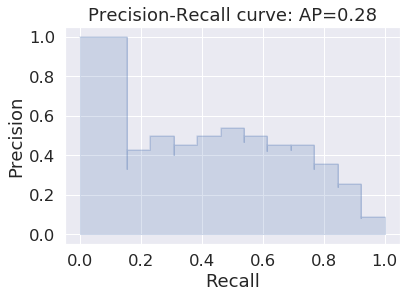

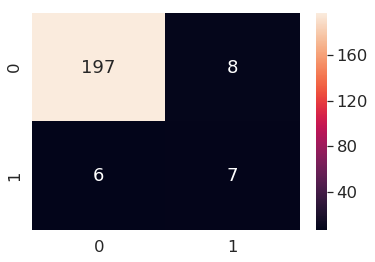

Fit DTC
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       205
           1       0.56      0.69      0.62        13

   micro avg       0.95      0.95      0.95       218
   macro avg       0.77      0.83      0.80       218
weighted avg       0.96      0.95      0.95       218

roc_auc 	 0.894


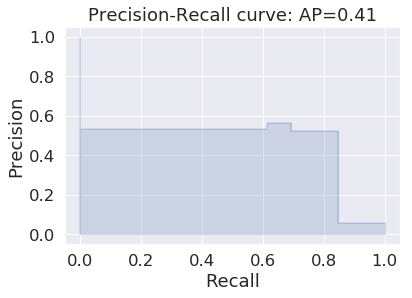

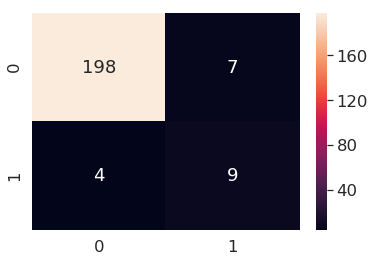

Fit RFC
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       205
           1       0.71      0.38      0.50        13

   micro avg       0.95      0.95      0.95       218
   macro avg       0.84      0.69      0.74       218
weighted avg       0.95      0.95      0.95       218

roc_auc 	 0.957


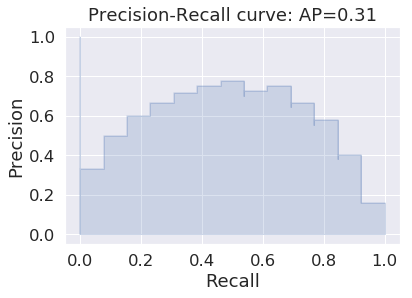

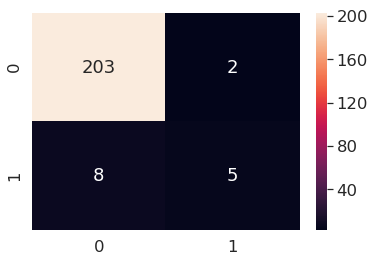

Fit GBC
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       205
           1       0.52      0.85      0.65        13

   micro avg       0.94      0.94      0.94       218
   macro avg       0.76      0.90      0.81       218
weighted avg       0.96      0.94      0.95       218

roc_auc 	 0.902


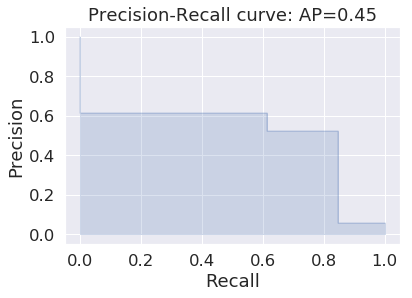

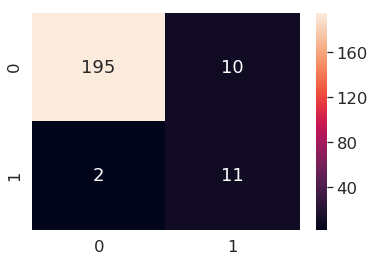

In [41]:
for model_name in models.keys():
    print('Fit ' + model_name)
    warnings.simplefilter(action='ignore')
    clf = GridSearchCV(models[model_name], parameters[model_name],
                       cv=cv, n_jobs=1,scoring = 'f1')
    clf.fit(X_tr, y_tr)
    # Predition part
    y_pred = clf.predict(X_te)
    y_prob = clf.predict_proba(X_te)[:,1]
    labels_proba[model_name + '_te'] = y_prob
    labels_predict[model_name + '_te'] = clf.predict(X_te)
    
    print_stats(y_te, y_pred, y_prob)

## Zero constant prediction

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       205
           1       0.00      0.00      0.00        13

   micro avg       0.94      0.94      0.94       218
   macro avg       0.47      0.50      0.48       218
weighted avg       0.88      0.94      0.91       218



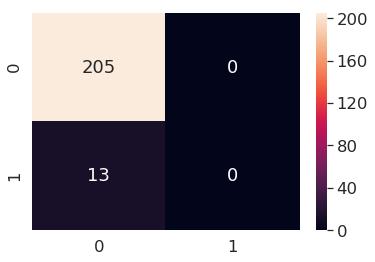

In [42]:
zeros= np.zeros(len(y_te))
print(classification_report(y_te, zeros))
sns.heatmap(confusion_matrix(y_te, zeros), annot=True, fmt="d")

## Ones constant prediction

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.06      1.00      0.11        13

   micro avg       0.06      0.06      0.06       218
   macro avg       0.03      0.50      0.06       218
weighted avg       0.00      0.06      0.01       218



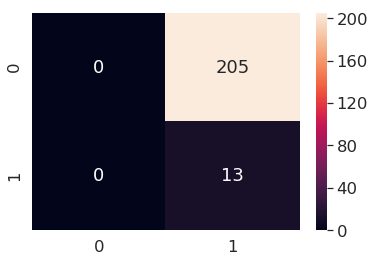

In [43]:
zeros= np.ones(len(y_te))
print(classification_report(y_te, zeros))
sns.heatmap(confusion_matrix(y_te, zeros), annot=True, fmt="d")

# Conclusion

1.During that task I managed to prepare data for ML classification. All missing data was replaced with NaN values. 
I've handled NaN data in 3 different ways: 
* replacing data with median values
* discovering dependecies with correlation matrix and according to that replacing data
* dropping data with NaN

2.After preparation there was a division of data on features and labels. Due to description ambiguity it was a complicated task to find target labels. As the final decision it was desided to use Biopsy as labels. 

3.After data preprocessing there was a research, devoted to linear dependencies of features with labels. During this research was idea to count unique values in each feature, due to that some of them were dropped.

4.After It the goal was to provide classification using ML methods. The main part of this job was devoted to handling unbalanced data. As the solution I desided to use Stratified KFold cross validation. The main point was to fight for recall metrics (why see above in Classification). I used 4 classifiers (see above) and one constant prediction classifier (all zeros or ones), compared them. All results are visualised, metrics are represented below. From presented, best recall metrics has Gradient Boosting Classifier, it's the best method in terms of our task.

5.My personal conclusion, that during data proccesing there were some interesting facts, related to represented data, for example durin IUD data fulfilling was discovered, that it's not as good as another contraceptives (why see above). What's more, about real-life task application I can say, that maybe more data must be provided for real-life solution and also more historic data with normal cancer data target labels.
